In [1]:
import cv2
import numpy as np

import os
from os import listdir
from os.path import isfile, join
import shutil

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random

In [2]:
path_temp_folder_images = "data/resumes/temp/"

In [3]:
path_directories = [x[0]  for x in os.walk(path_temp_folder_images)]

#random.shuffle(path_directories)

folder_rectagles = list(filter(lambda x: '_rectangles' in x, path_directories))

print(folder_rectagles)

['data/resumes/temp/images_resumes_105.pdf_rectangles', 'data/resumes/temp/images_resumes_105.pdf_rectangles/cuts_1_105', 'data/resumes/temp/images_resumes_102.pdf_rectangles', 'data/resumes/temp/images_resumes_106.pdf_rectangles', 'data/resumes/temp/images_resumes_107.pdf_rectangles', 'data/resumes/temp/images_resumes_10.pdf_rectangles', 'data/resumes/temp/images_resumes_100.pdf_rectangles', 'data/resumes/temp/images_resumes_104.pdf_rectangles', 'data/resumes/temp/images_resumes_103.pdf_rectangles', 'data/resumes/temp/images_resumes_1.pdf_rectangles', 'data/resumes/temp/images_resumes_101.pdf_rectangles']


In [4]:
def get_files_in_directory(path_directory, extension):

    onlyfiles = [f for f in listdir(path_directory) if isfile(join(path_directory, f))]

    files_names = list(filter(lambda x: '.'+extension in x, onlyfiles))
    
    files_names.sort()
    
    return files_names

In [5]:
def cut_image(path_file_image, path_output_images_folder):
    img = cv2.imread(path_file_image)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.bilateralFilter(gray, 11, 17, 17)

    kernel = np.ones((5,5),np.uint8)
    erosion = cv2.erode(gray,kernel,iterations = 1)

    fig = plt.figure()
    fig.set_size_inches(10,23)
    plt.title('erosion')
    plt.imshow(erosion, cmap='gray', aspect='auto') 
    plt.show()
    
    kernel = np.ones((4,4),np.uint8)
    dilation = cv2.dilate(erosion,kernel, iterations = 2)

    fig = plt.figure()
    fig.set_size_inches(10,23)
    plt.title('dilation')
    plt.imshow(dilation, cmap='gray', aspect='auto') 
    plt.show()

    blurred = cv2.GaussianBlur(gray, (7,7), 3)

    fig = plt.figure()
    fig.set_size_inches(10,23)
    plt.title('blurred')
    plt.imshow(blurred, cmap='gray', aspect='auto') 
    plt.show()

    img_thresh = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY)[1]
    
    edged = cv2.Canny(img_thresh, 120, 255, 2)

    fig = plt.figure()
    fig.set_size_inches(10,23)
    plt.title('edged')
    plt.imshow(edged, cmap='gray', aspect='auto') 
    plt.show()

    # _, contours = cv2.findContours(gray, cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_SIMPLE)

    #rects = [cv2.boundingRect(cnt) for cnt in _]
    #rects = sorted(rects,key=lambda  x:x[1],reverse=False)

    """ Existe el problema que en los rectangulos toma el borde externo y el interno, con esto solo toma el externo"""
    rects , hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    #rects = rects[0] if len(rects) == 2 else rects[1]

    i = -1
    j = 1
    y_old = 8000
    x_old = 8000
    for rect in rects:
        x, y, w, h = cv2.boundingRect(rect)
        # x, y, w, h = rect
        area = w * h
        print(area)
        
        if 10000 < area < 25351708:

            if (y_old - y) > 200:
                i += 1
                y_old = y
                print(area)

            if abs(x_old - x) > 0:
                x_old = x
                x, y, w, h = cv2.boundingRect(rect)
                # x,y,w,h = rect

                out = img[y+10:y+h-10, x+10:x+w-10]

                #cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 3)

                #cv2.imshow('out', out)
                #cv2.waitKey(0)

                #cv2.destroyAllWindows()
                
                if out.any():
                    cv2.imwrite(join(path_output_images_folder,'crop_' + str(j) + '.jpeg'), out)

                j+=1

In [6]:
for directory in folder_rectagles:
    print("#########DELETE FOLDER###########")
    print(directory)
    path_directories = [x[0]  for x in os.walk(directory)]

    
    folder_cuts = list(filter(lambda x: 'cuts' in x, path_directories))

    print(folder_cuts)

    #Eliminar carpetas temporales "cuts"

    for dir in folder_cuts:

        if os.path.exists(dir):

            shutil.rmtree(dir)

        else:
            # file not found message
            print("File not found in the directory")

#########DELETE FOLDER###########
data/resumes/temp/images_resumes_105.pdf_rectangles
['data/resumes/temp/images_resumes_105.pdf_rectangles/cuts_1_105']
#########DELETE FOLDER###########
data/resumes/temp/images_resumes_105.pdf_rectangles/cuts_1_105
[]
#########DELETE FOLDER###########
data/resumes/temp/images_resumes_102.pdf_rectangles
[]
#########DELETE FOLDER###########
data/resumes/temp/images_resumes_106.pdf_rectangles
[]
#########DELETE FOLDER###########
data/resumes/temp/images_resumes_107.pdf_rectangles
[]
#########DELETE FOLDER###########
data/resumes/temp/images_resumes_10.pdf_rectangles
[]
#########DELETE FOLDER###########
data/resumes/temp/images_resumes_100.pdf_rectangles
[]
#########DELETE FOLDER###########
data/resumes/temp/images_resumes_104.pdf_rectangles
[]
#########DELETE FOLDER###########
data/resumes/temp/images_resumes_103.pdf_rectangles
[]
#########DELETE FOLDER###########
data/resumes/temp/images_resumes_1.pdf_rectangles
[]
#########DELETE FOLDER###########
data

####################
data/resumes/temp/images_resumes_105.pdf_rectangles
1_105_rectangles.jpeg
data/resumes/temp/images_resumes_105.pdf_rectangles/1_105_rectangles.jpeg
data/resumes/temp/images_resumes_105.pdf_rectangles/cuts_1_105


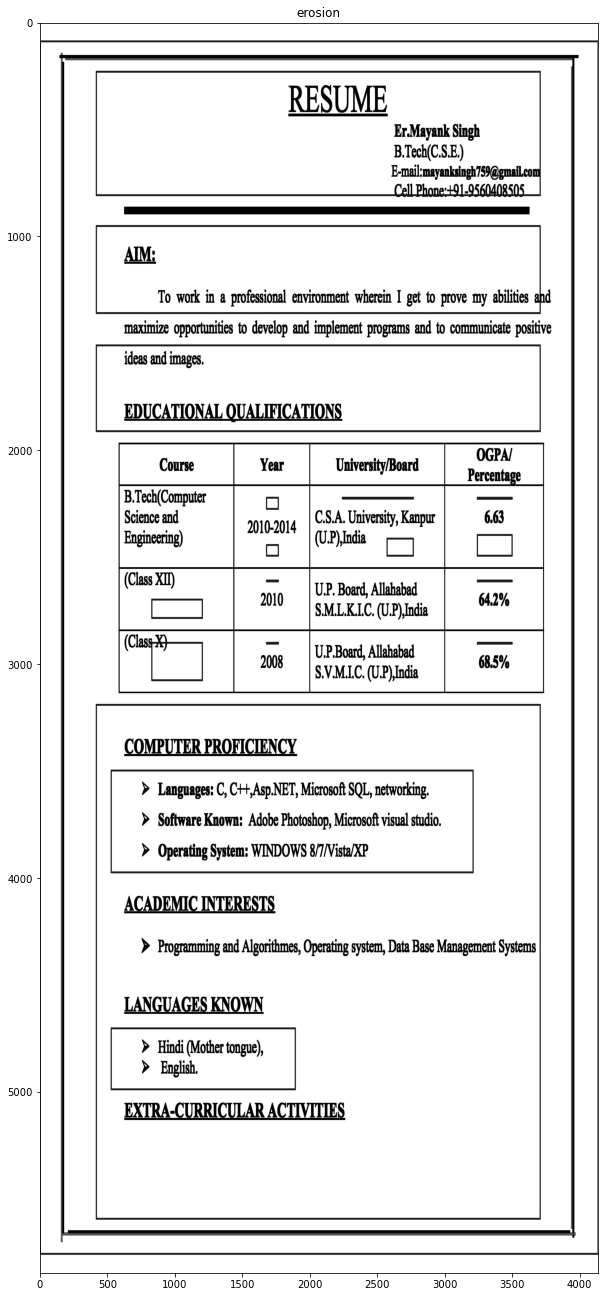

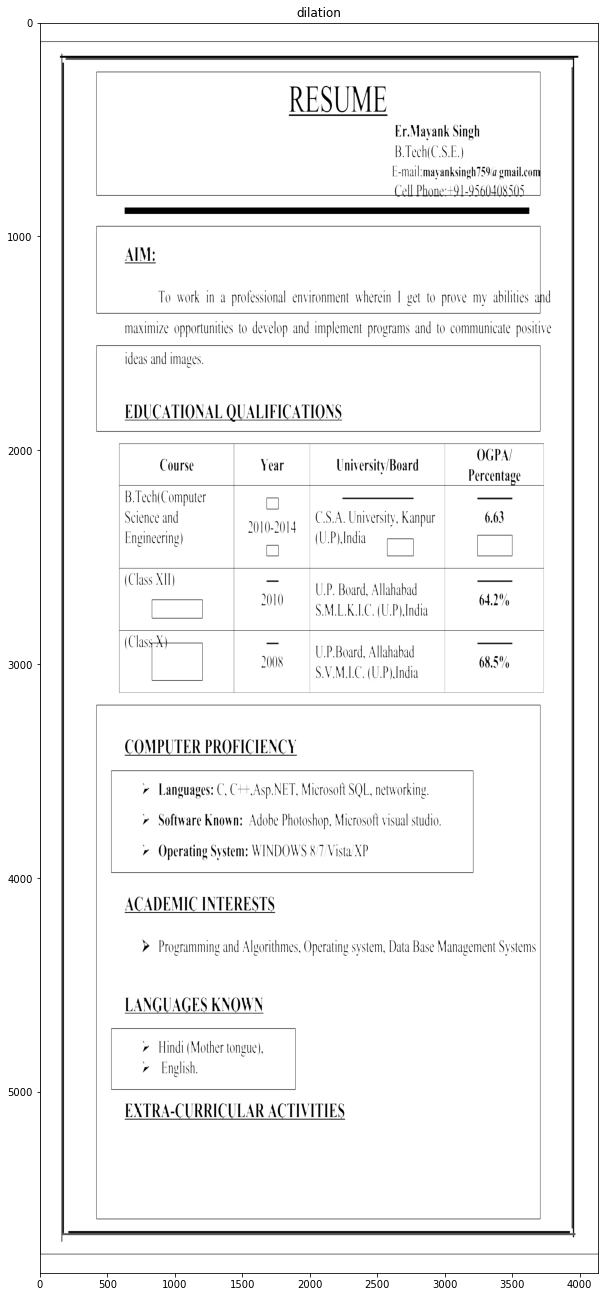

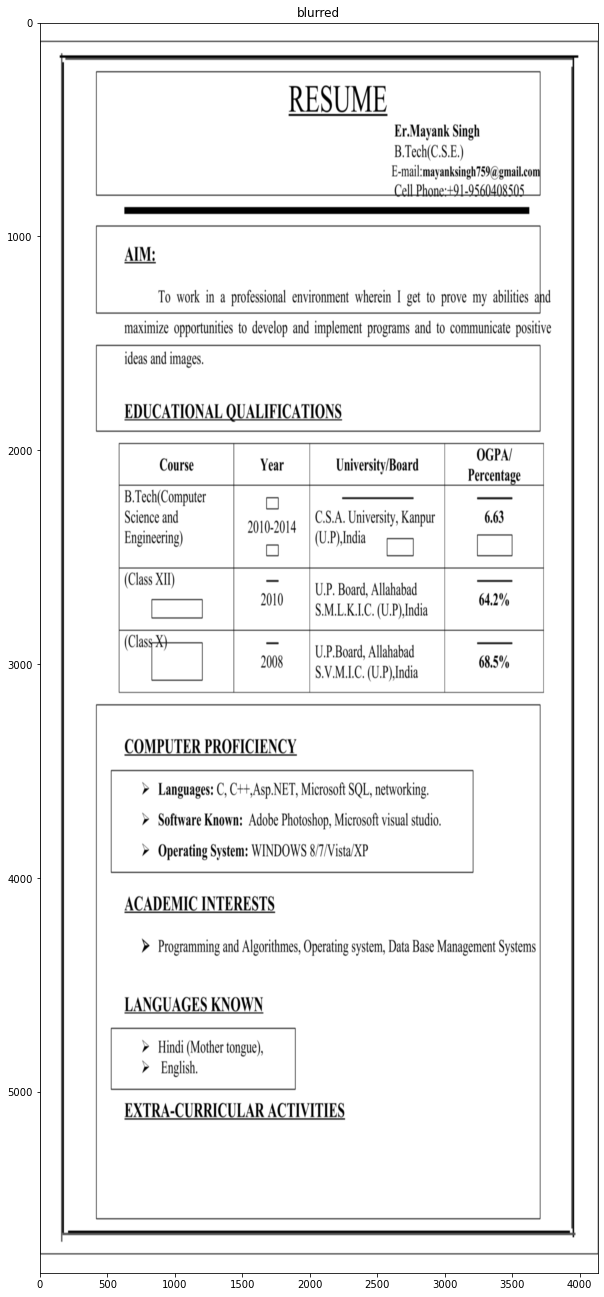

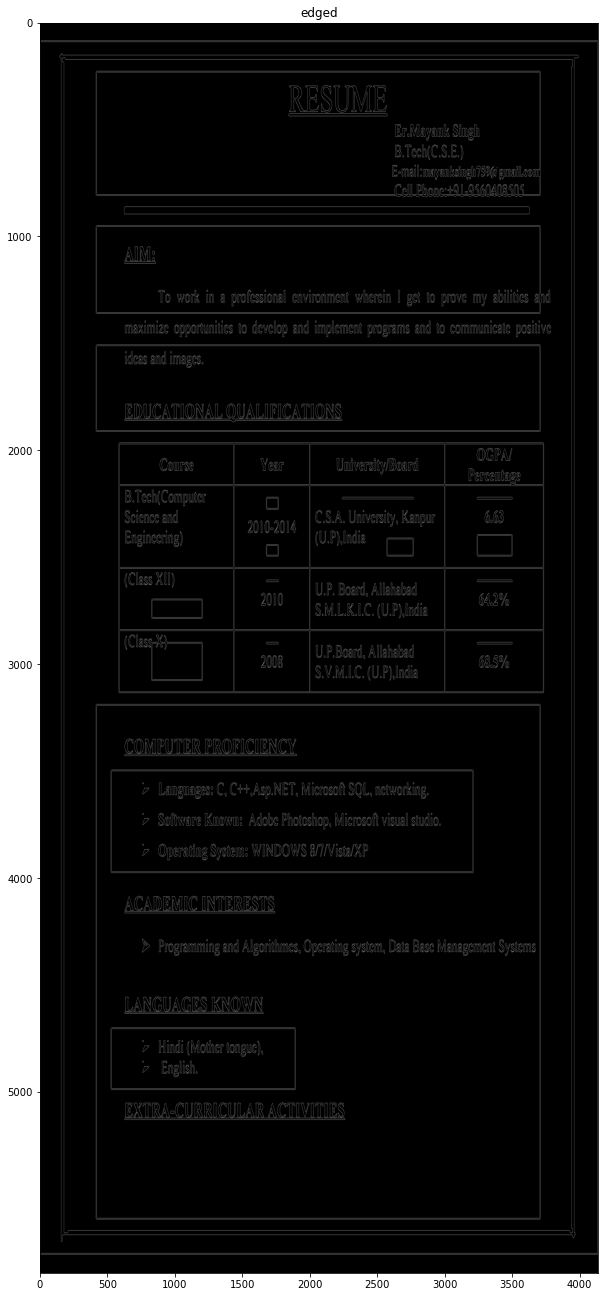

4134
23388190
23388190
23388190
21355130
21355130
20769033
20769033
7931952
7931952
7875032
7875032
14715
14715
360
360
4158
4158
288
288
4224
4224
288
288
4224
4224
288
288
3618
3618
1608
1608
4020
4020
1608
1608
4224
4224
1608
1608
4020
4020
4154
4154
560
560
3685
3685
3944
3944
1541
1541
4154
4154
560
560
4154
4154
560
560
3944
3944
4221
4221
560
560
4020
4020
4288
4288
3551
3551
3243
3243
4347
4347
4347
4347
4347
4347
398670
398670
382160
382160
100
100
1488
1488
1053
176
1053
2128
2128
336
336
100
100
520
520
468
468
1435
1435
2378
2378
2065
2065
767
767
64
64
81
81
1
234
1488
1488
2128
2128
336
336
1400
1400
468
468
1000
1000
520
520
520
520
1386
1386
1435
1435
1558
1558
714
714
1386
1386
1558
1558
714
714
1435
1435
864
864
864
864
630
1
1122
1292
3596
3596
2784
2784
2065
2065
2280
2280
576
576
64
64
81
81
81
81
8240
8240
4224
4224
288
288
4224
4224
288
288
4087
4087
6072
6072
4087
4087
4489
4489
3551
3551
3944
3944
4087
4087
3685
3685
4899
4899
1947
1947
3243
3243
4692
4692
4692

1372812
1323452
1323452
208
208
208
208
208
208
208
208
1053
1026
2128
2128
336
336
1053
176
1053
1053
132
1026
1320
100
100
520
520
520
520
507
507
1280
2109
2109
560
560
1365
1365
975
975
1520
1520
714
714
468
468
520
520
1000
1000
2145
2145
560
560
1520
1520
714
714
1000
1000
507
507
1365
1365
1280
520
520
100
100
100
100
1520
1520
714
714
1000
1000
1320
507
507
1000
1000
2145
2145
1520
1520
714
714
1386
1386
1763
1763
1353
1353
1558
1558
714
714
2146
576
2146
1386
1386
1435
1435
1353
1353
1386
1386
1435
1435
1386
1386
1763
880
1435
1435
1435
1435
1353
1353
1435
1435
1558
1558
714
714
1353
1353
2146
608
2146
1435
1435
1558
1558
714
714
864
864
864
864
864
864
864
864
870
870
2726
2726
767
767
2183
2183
570
570
767
767
2065
2065
81
81
81
81
81
81
81
81
2100
2100
81
81
81
81
1860
1860
81
81
2097
2097
289
289
289
289
4224
4224
288
288
5360
5360
1541
1541
105105
105105
1936872
1936872
184
184
323
323
480
480
390
390
390
390
588
588
100
100
352
352
874
874
874
874
874
874
580
580
600
600

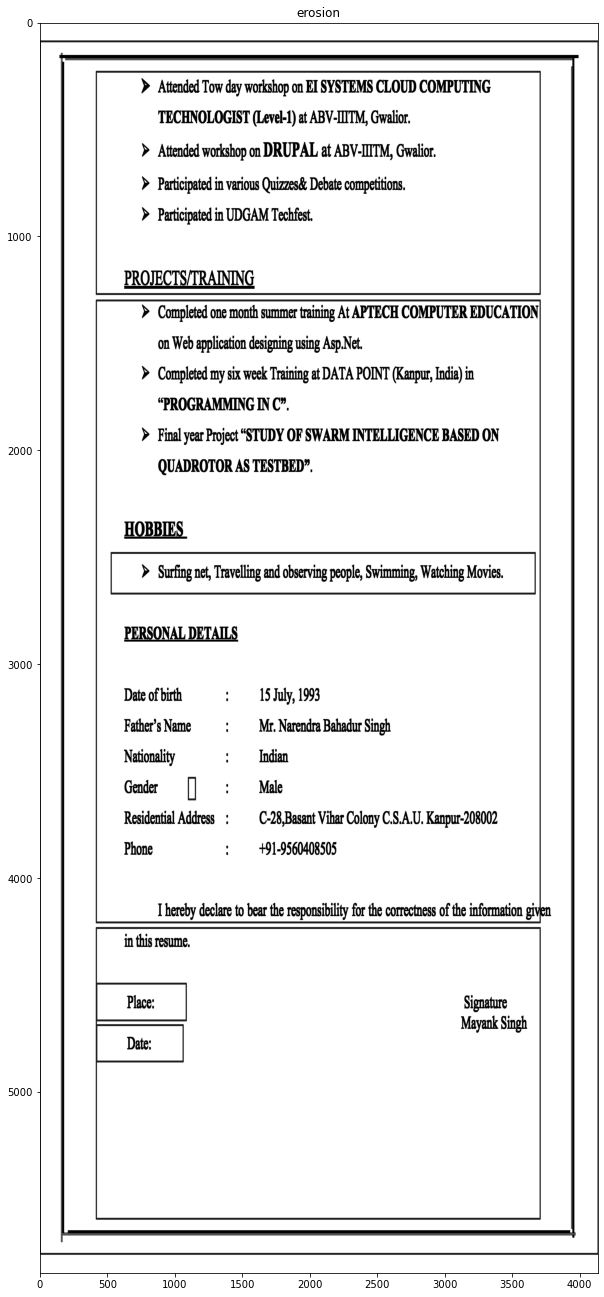

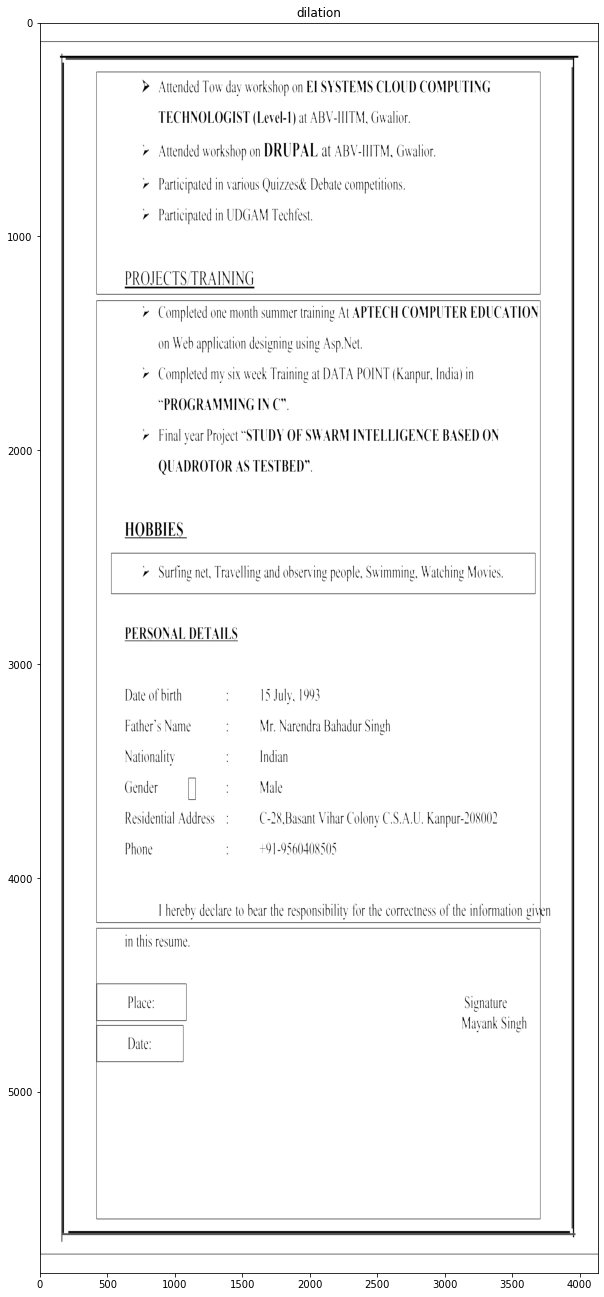

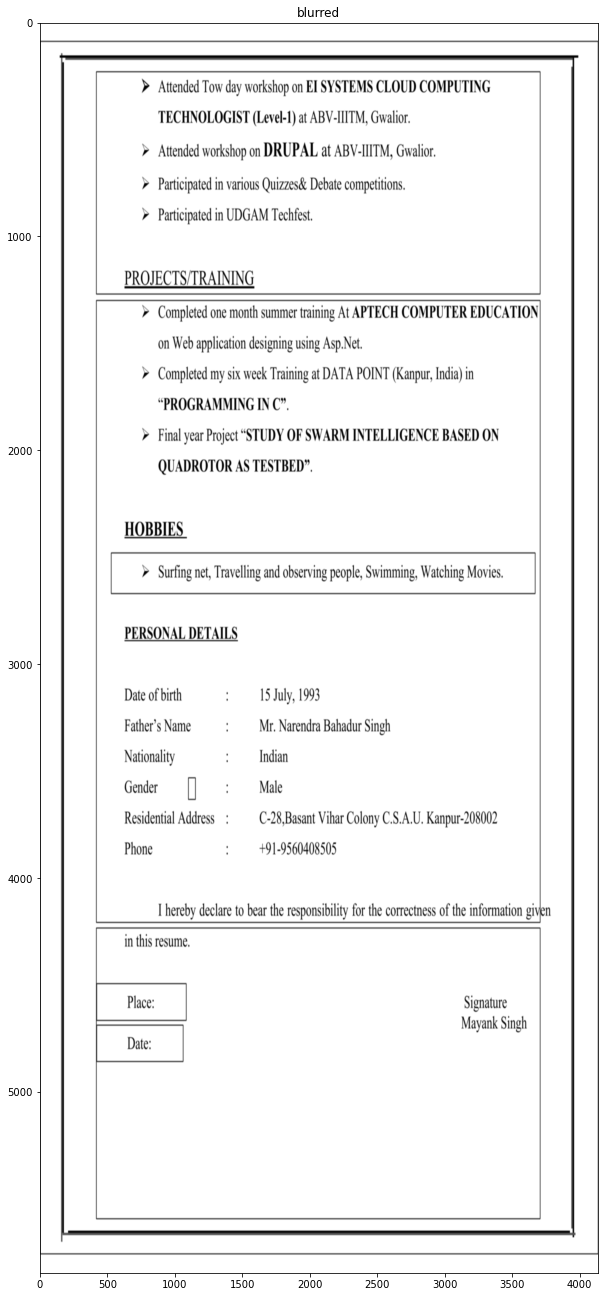

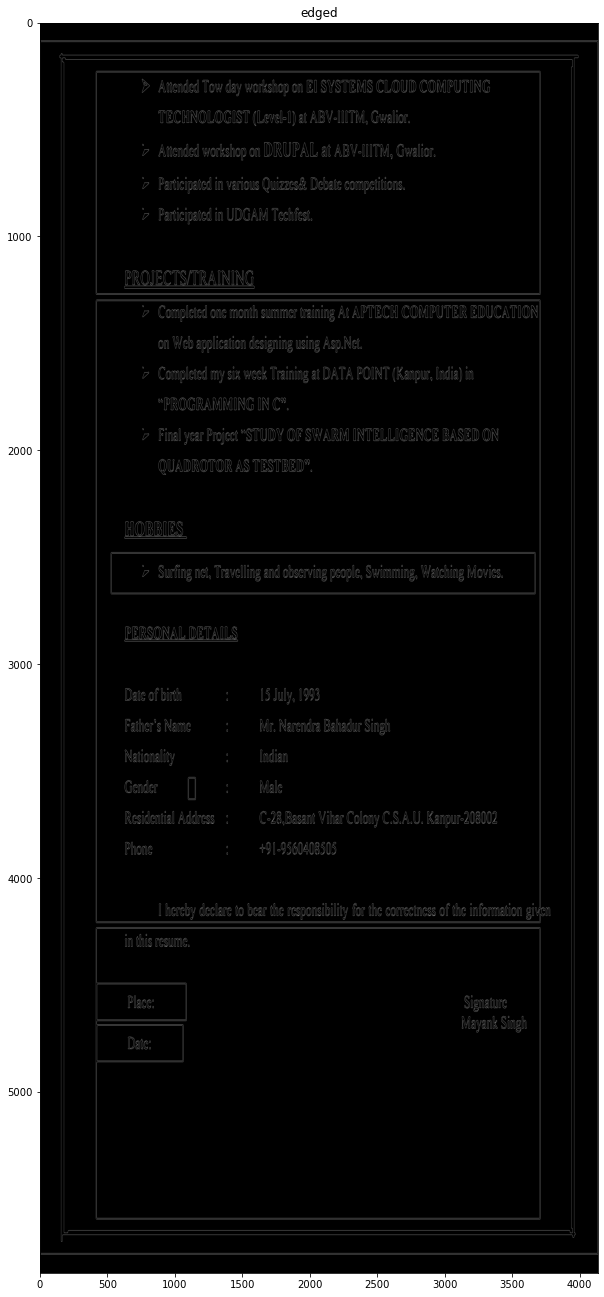

4134
23388190
23388190
23388190
21355130
21355130
20769033
20769033
4496310
4496310
105576
105576
100
100
208
208
100
100
1280
1386
1386
864
864
2964
2964
1470
1470
110712
110712
100
100
208
208
100
100
1312
1312
1320
1386
1386
2204
400
2204
754
754
4449820
4449820
208
208
208
208
2128
2128
336
336
468
468
507
507
1320
2109
2109
1280
1435
1435
1400
1400
3596
3596
2030
2030
2280
2280
2030
2030
81
81
208
208
2128
2128
336
336
975
975
1400
1400
1280
468
468
507
507
1386
1386
1435
1435
912
912
2280
2280
81
81
100
100
1
1053
176
1053
176
1053
560
560
1400
1400
100
100
1000
1000
100
100
520
520
520
520
1386
1386
1763
1763
1386
1386
1435
1435
912
912
2065
2065
81
81
81
81
1435
1435
9533452
9533452
208
208
208
208
608
608
2128
2128
336
336
1
1053
176
1
1053
176
1
1053
176
1053
176
1053
520
520
468
468
1558
1558
714
714
520
520
1280
1280
208
208
560
560
1040
1040
1558
1558
714
714
520
520
1520
1520
714
714
100
100
100
100
1000
1080
1080
1000
1000
1558
1558
714
714
2109
2109
520
520
520
520
520


In [7]:
for directory in folder_rectagles:
    print("####################")
    print(directory)
    
    
    pages_images = files_names = get_files_in_directory(directory, "jpeg")
    for page_image in pages_images:
        print(page_image)
        part_name_file = page_image.split(".")
        
        pat_original_image = join(directory,page_image);
        print(pat_original_image)
        
        result_image_restangle_folder = directory + "/cuts_" + part_name_file[0].replace("_rectangles","")
        
        isExistFolder = os.path.exists(result_image_restangle_folder)

        if not isExistFolder:
            print(result_image_restangle_folder)
            os.makedirs(result_image_restangle_folder)
        
        #result_path_image = join(result_image_restangle_folder,part_name_file[0] + "_rectangles.jpeg")
        #print(result_path_image)
        #Process_Image(join(directory,page_image),result_path_image)
        
        cut_image(pat_original_image, result_image_restangle_folder)
        
    break
    